[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ytdxa3se)

## Introducción

En este notebook, se realizará un estudio comparativo de modelos de regresión para predecir el costo de un seguro médico. El dataset utilizado es el [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) de Kaggle.



**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**

* Regresión lineal
* K-vecinos más cercanos
* Árbol de decisión
* Máquina de vectores de soporte
* Random Forest
* Ensamble de modelos

## 1. Comprensión del problema

La primera fase del proyecto implica una comprensión detallada del problema en cuestión. En este caso, el objetivo es predecir el costo de un seguro médico. Se dispone de un conjunto de datos que contiene información sobre 1338 personas, caracterizadas por factores como edad, sexo, índice de masa corporal (BMI), número de hijos, hábito de fumar, región de residencia en los Estados Unidos y el costo de su seguro médico.

Características del Dataset:

1. **Edad**: Variable que representa la edad de cada individuo.
2. **Sexo**: Indicador del género del individuo (masculino o femenino).
3. **Índice de Masa Corporal (BMI)**: Medida que evalúa la proporción de peso y altura.
4. **Número de Hijos**: Cantidad de hijos o dependientes cubiertos por el seguro.
5. **Hábito de Fumar**: Indica si el individuo es fumador o no.
6. **Región de Residencia**: Ubicación geográfica en los Estados Unidos (noreste, sureste, suroeste, noroeste).
7. **Costo de Seguro Médico**: Variable dependiente que se busca predecir.


Dado que la variable objetivo es continua (el costo del seguro médico), este problema se clasifica como un problema de regresión. La comprensión detallada de estas variables es esencial para seleccionar y diseñar modelos de regresión efectivos en las fases subsiguientes del proyecto.



## 2. Análisis exploratorio de datos

En esta fase, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible. Este paso es crucial para identificar patrones, tendencias y características que puedan influir en la predicción del costo del seguro médico.

### Pasos Clave:

a. Estadísticas Descriptivas

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

b. Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

c. Correlación entre Variables
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

d. Exploración de Variables Categóricas
Para las variables categóricas, como el género y la región de residencia, se evaluarán las distribuciones de frecuencia y su impacto en el costo del seguro.

**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes en la predicción del costo del seguro médico.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de regresión.

In [ ]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.path.dirname(os.getcwd()))

In [3]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
ruta_dataset = os.path.join(dir_root, 'datasets', 'regression', 'insurance_cost.csv')

# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> **Nota:** Pandas también proporciona una función para leer archivos de Excel, llamada `read_excel`. 


## Exploración del DataFrame

Una vez que hemos cargado nuestros datos en un DataFrame de Pandas, hay varias funciones útiles que podemos utilizar para explorar nuestros datos.




### 1. **Obtener información sobre el DataFrame**

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?




In [4]:
# Mostrar información sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. **Obtener estadísticas descriptivas**

Podemos usar la función `describe` para obtener estadísticas descriptivas sobre columnas numéricas en el DataFrame. Esto nos dará el número de valores en la columna, el valor medio, la desviación estándar, el valor mínimo, el valor máximo y varios percentiles para cada columna numérica.

Lo cual nos permite responder preguntas como:

* ¿Cuál es el valor medio de cada columna numérica?
* ¿Cuál es el valor máximo de cada columna numérica?
* ¿Cuál es el valor mínimo de cada columna numérica?
* ¿Cuál es la desviación estándar de cada columna numérica?
* ¿Cuál es el percentil 25, 50 y 75 de cada columna numérica?
  

In [5]:
# Mostrar estadísticas descriptivas
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3. **Verificar si hay valores faltantes**

Podemos usar la función `isnull` para verificar si hay valores faltantes en el DataFrame. Esto nos dará una matriz booleana que indica si cada celda en el DataFrame contiene o no un valor faltante.


In [6]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 4. **Explorar la distribución de la variable objetivo**

Para estudiar una variable continua, podemos usar un histograma para visualizar la distribución de valores. Podemos usar la función `hist` para crear un histograma de una columna en el DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es la distribución de valores para la variable objetivo?
* ¿Cuál es el rango de valores para la variable objetivo?
* ¿Cuál es la media de la variable objetivo?
* ¿Existe una asimetría en la distribución de la variable objetivo?
* ¿Existen valores atípicos en la variable objetivo?


Text(0.5, 0, 'charges')

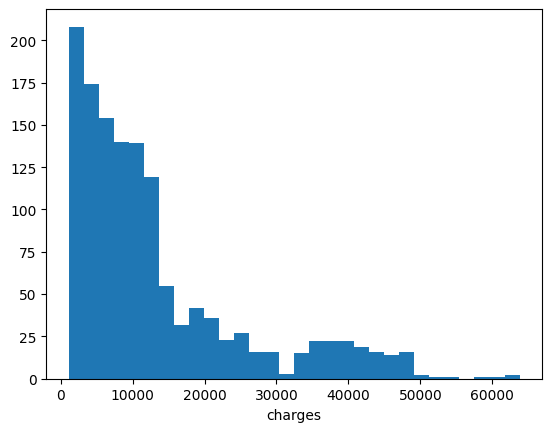

In [10]:
# histograma de la variable objetivo
import matplotlib.pyplot as plt
plt.hist(data['charges'], bins=30)
plt.xlabel('charges')


### 5. **Explorar la correlación entre las variables**

Podemos usar la función `corr` para explorar la correlación entre las variables. Esto nos dará una matriz de correlación que muestra la correlación entre cada par de variables.

Lo cual nos permite responder preguntas como:

* ¿Qué variables están altamente correlacionadas entre sí?
* ¿Qué variables están altamente correlacionadas con la variable objetivo?
* ¿Qué variables están altamente correlacionadas con la variable objetivo, pero no entre sí?
* ¿Qué variables no están correlacionadas con la variable objetivo?
  

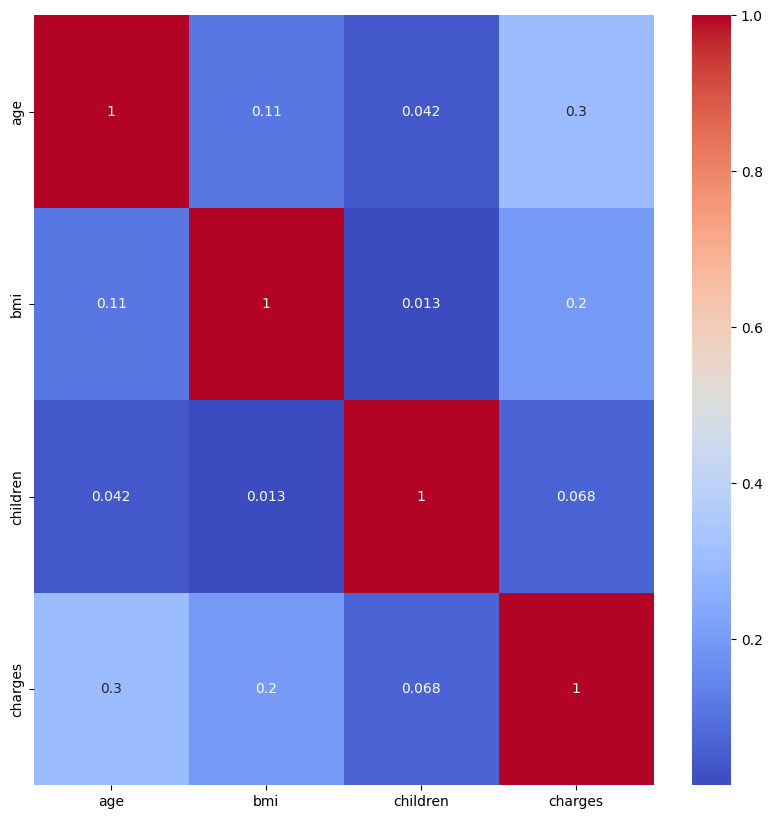

In [14]:
import seaborn as sns


# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 6. **Explorar la distribución de las variables**

Podemos usar la función `hist` para explorar la distribución de las variables. Esto nos dará un histograma para cada columna numérica en el DataFrame.

Lo cual nos permite responder preguntas como:

* ¿Qué tipo de distribución tiene cada columna numérica?
* ¿Qué tipo de distribución tiene la variable objetivo?
* ¿Qué tipo de distribución tienen las variables numéricas que están altamente correlacionadas con la variable objetivo?
* ¿Qué tipo de distribución tienen las variables numéricas que no están correlacionadas con la variable objetivo?
* ¿Qué variables son continuas?
* ¿Qué variables son discretas o categóricas?

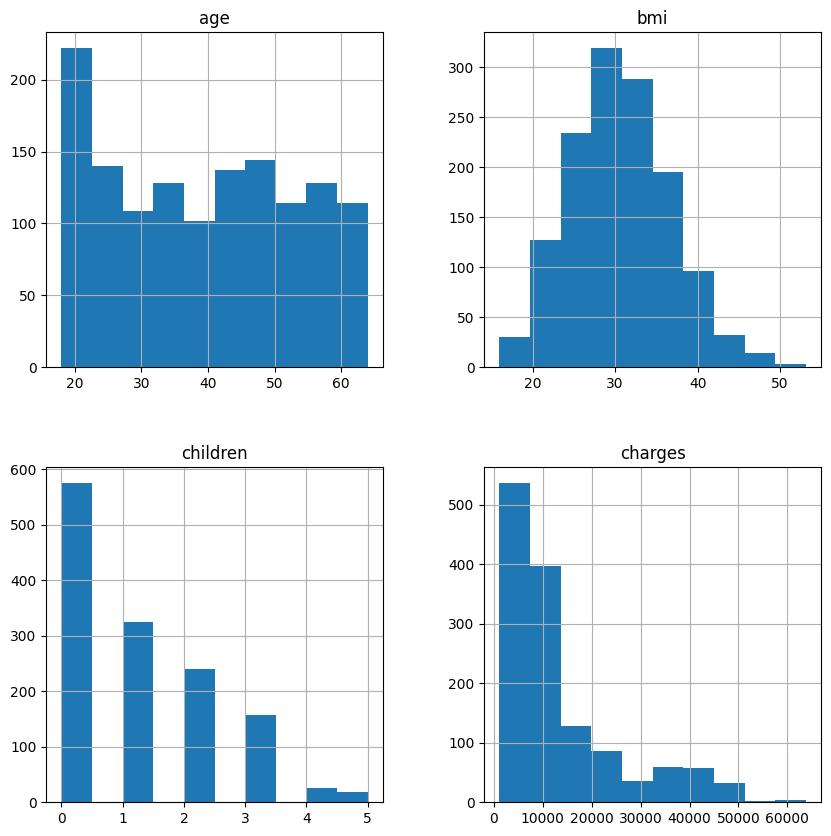

In [15]:
data.hist(figsize=(10, 10))
plt.show()

### 7. **Explorar la distribución de las variables categóricas**

Podemos usar la función `value_counts` para explorar la distribución de las variables categóricas. Esto nos dará el número de valores únicos para cada variable categórica en el DataFrame.

Lo cual nos permite responder preguntas como:

* ¿Cuántos valores únicos hay para cada variable categórica?
* ¿Cuál es la distribución de valores para cada variable categórica?

In [16]:
print(data['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


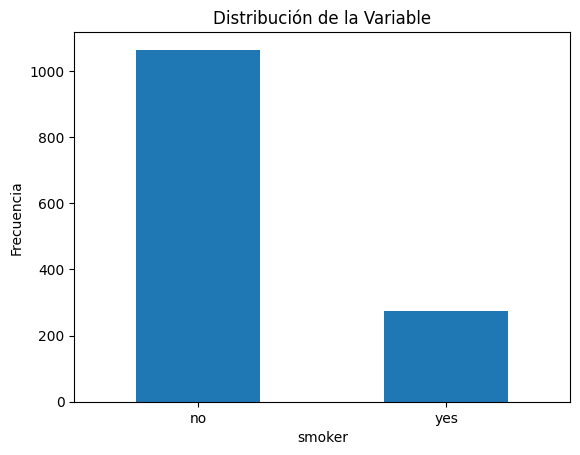

In [20]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['smoker'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("smoker");

In [18]:
print(data['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


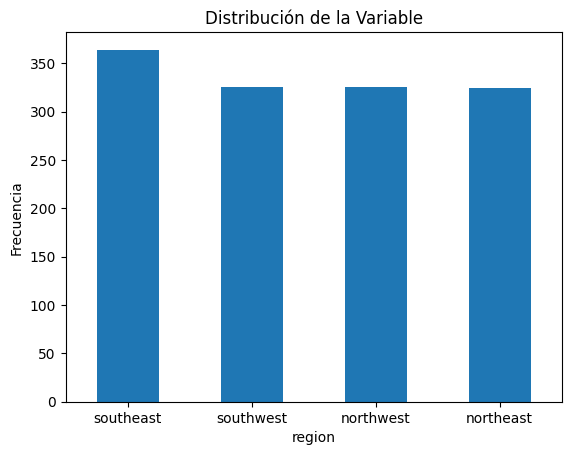

In [21]:
count_classes = pd.value_counts(data['region'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("region");

**Sugerencias para el próximo paso:**
- Visualizar los datos con gráficos.
- Preprocesar los datos para el aprendizaje automático.
- Dividir el dataset en conjuntos de entrenamiento y prueba.